In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from datetime import datetime


In [2]:
df=pd.read_csv('BTC.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,APrice
0,7/16/2010,0.04951,0.04951,0.04951,0.04951,0.04951,0,0.049510
1,7/17/2010,0.04951,0.08585,0.05941,0.08584,0.08584,5,0.067675
2,7/18/2010,0.08584,0.09307,0.07723,0.08080,0.08080,49,0.083320
3,7/19/2010,0.08080,0.08181,0.07426,0.07474,0.07474,20,0.077770
4,7/20/2010,0.07474,0.07921,0.06634,0.07921,0.07921,42,0.076975


In [3]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,8
Number of observations,3255
Total Missing (%),0.0%
Total size in memory,203.5 KiB
Average record size in memory,64.0 B
Numeric,2
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [4]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="Titanic data profiling.html")

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,APrice
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0,0.049510
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5,0.067675
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49,0.083320
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20,0.077770
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42,0.076975


In [6]:
df = df.reset_index().set_index('Date').resample('D').mean()
df.head()

,index,Open,High,Low,Close,Adj Close,Volume,APrice
Date,,,,,,,,
2010-07-16,0.0,0.04951,0.04951,0.04951,0.04951,0.04951,0.0,0.049510
2010-07-17,1.0,0.04951,0.08585,0.05941,0.08584,0.08584,5.0,0.067675
2010-07-18,2.0,0.08584,0.09307,0.07723,0.08080,0.08080,49.0,0.083320
2010-07-19,3.0,0.08080,0.08181,0.07426,0.07474,0.07474,20.0,0.077770
2010-07-20,4.0,0.07474,0.07921,0.06634,0.07921,0.07921,42.0,0.076975


In [7]:
df1=df.drop(columns=['Adj Close','Open','High','Low','Close','Volume','index'])
df1.head()

,APrice
Date,
2010-07-16,0.049510
2010-07-17,0.067675
2010-07-18,0.083320
2010-07-19,0.077770
2010-07-20,0.076975


In [8]:
df1.tail()

,APrice
Date,
2019-06-09,7832.219971
2019-06-10,7969.159912
2019-06-11,8045.729981
2019-06-12,8204.855225
2019-06-13,8464.495118


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3255 entries, 2010-07-16 to 2019-06-13
Freq: D
Data columns (total 1 columns):
APrice     3246 non-null float64
dtypes: float64(1)
memory usage: 50.9 KB


In [10]:
df1.describe()

,APrice
count,3246.000000
mean,1725.106905
std,3024.586024
min,0.049510
25%,13.275000
50%,374.845001
75%,1177.093735
max,19206.155270


In [11]:
df1.isnull().values.any()

True

In [12]:
#importing Pandas 
import pandas as pd
#importing plotly and cufflinks in offline mode
import cufflinks as cf
%matplotlib inline
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

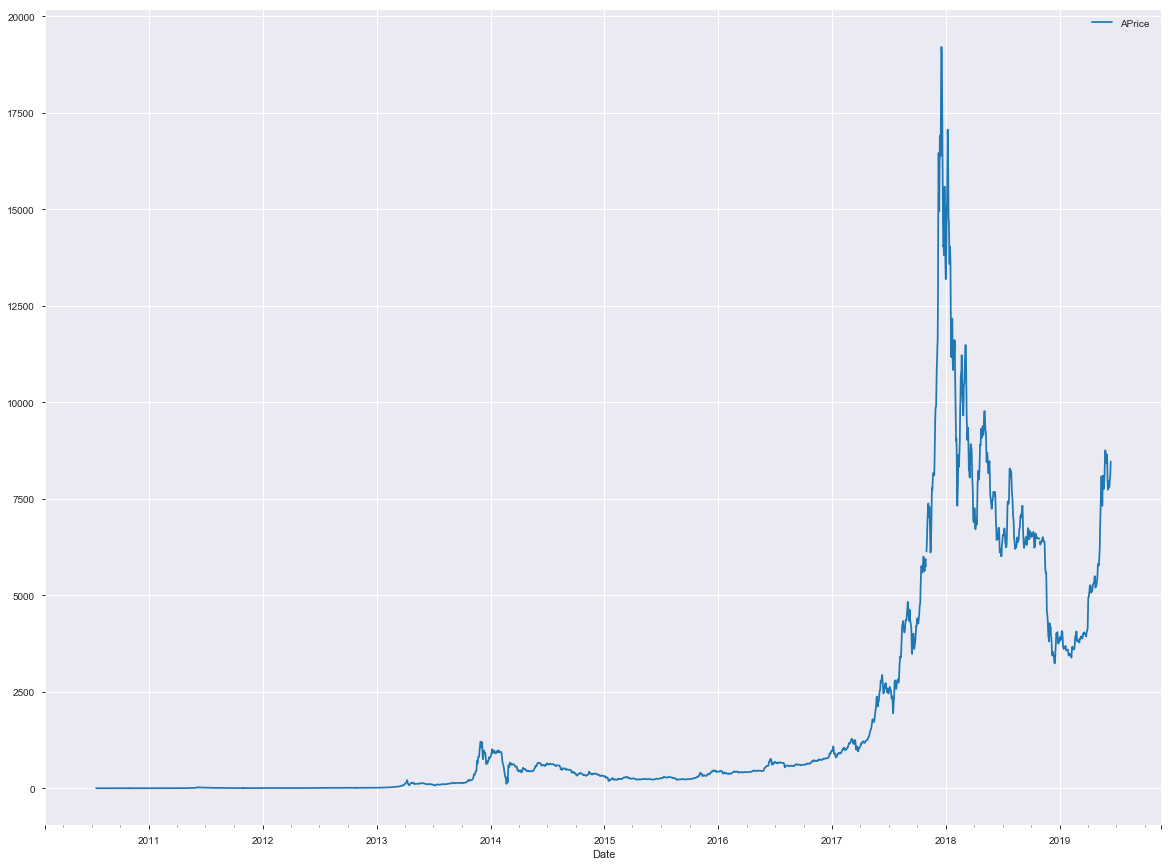

In [14]:
df1.plot(figsize=(20,15))

In [15]:
df1.iplot()

In [16]:
from pandas.tseries.offsets import DateOffset

In [17]:
y=df1.loc['2010':]
y.head()

,APrice
Date,
2010-07-16,0.049510
2010-07-17,0.067675
2010-07-18,0.083320
2010-07-19,0.077770
2010-07-20,0.076975


In [18]:
type(y)

pandas.core.frame.DataFrame

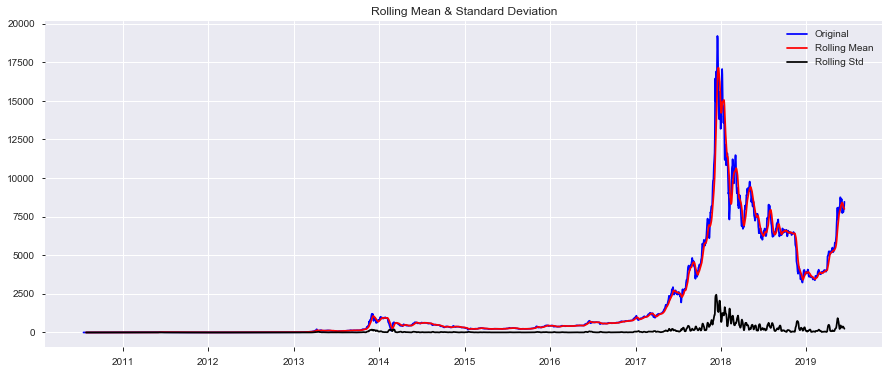

Results of Dickey-Fuller Test:
Test Statistic                   -1.229896
p-value                           0.660605
#Lags Used                       28.000000
Number of Observations Used    3217.000000
Critical Value (1%)              -3.432384
Critical Value (5%)              -2.862439
Critical Value (10%)             -2.567248
dtype: float64


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    Dickey_Fuller_test(timeseries)
    
def Dickey_Fuller_test(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(y.iloc[:,0].dropna())

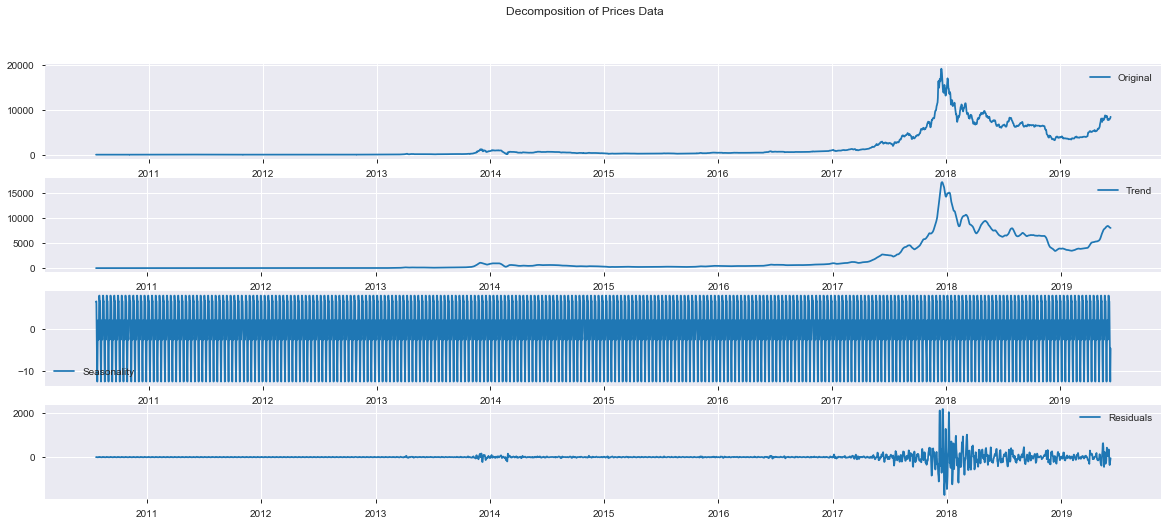

In [20]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y.dropna(),freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
fig.suptitle('Decomposition of Prices Data')
plt.show()
fig.set_size_inches(15,12)


In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
y['First Difference']=y-y.shift(1)

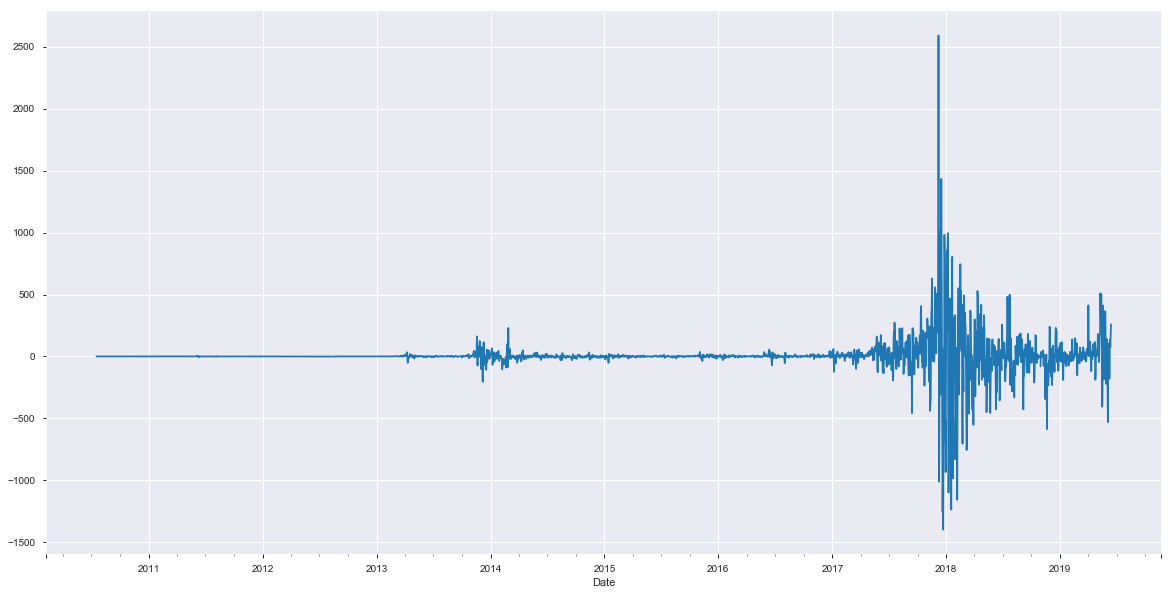

In [23]:
y['First Difference'].plot(figsize=(20,10))

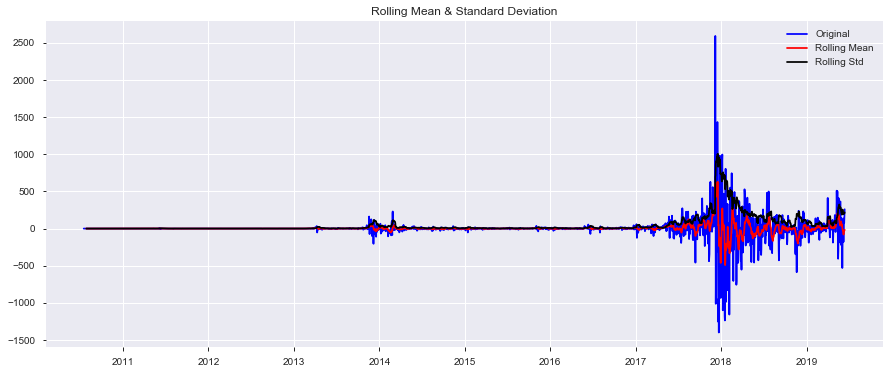

Results of Dickey-Fuller Test:
Test Statistic                -1.103067e+01
p-value                        5.678776e-20
#Lags Used                     2.700000e+01
Number of Observations Used    3.208000e+03
Critical Value (1%)           -3.432390e+00
Critical Value (5%)           -2.862441e+00
Critical Value (10%)          -2.567250e+00
dtype: float64


In [24]:
test_stationarity(y['First Difference'].dropna())

In [25]:
y['Second Difference']=y['First Difference']-y['First Difference'].shift(1)  


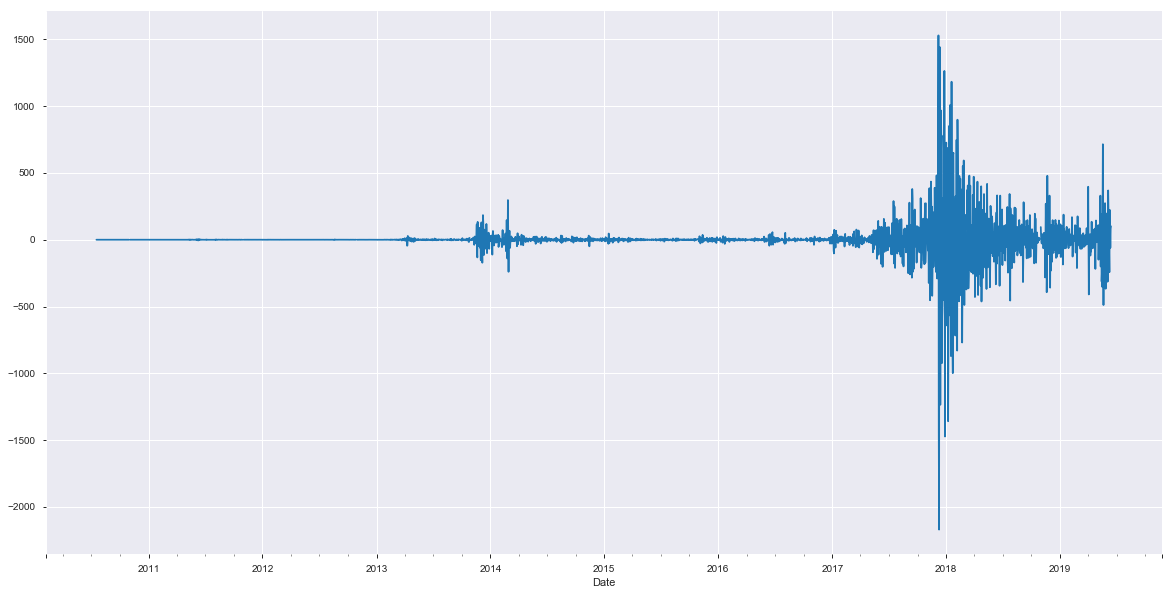

In [26]:
y['Second Difference'].plot(figsize=(20,10))

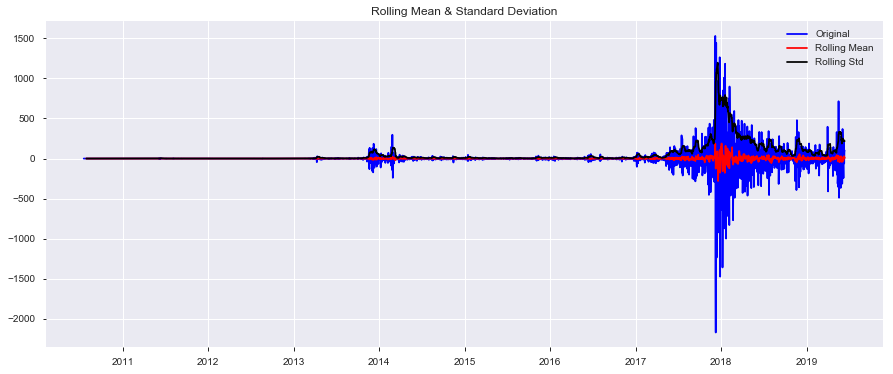

Results of Dickey-Fuller Test:
Test Statistic                -1.576590e+01
p-value                        1.176600e-28
#Lags Used                     2.700000e+01
Number of Observations Used    3.198000e+03
Critical Value (1%)           -3.432396e+00
Critical Value (5%)           -2.862444e+00
Critical Value (10%)          -2.567251e+00
dtype: float64


In [27]:
test_stationarity(y['Second Difference'].dropna())

In [28]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

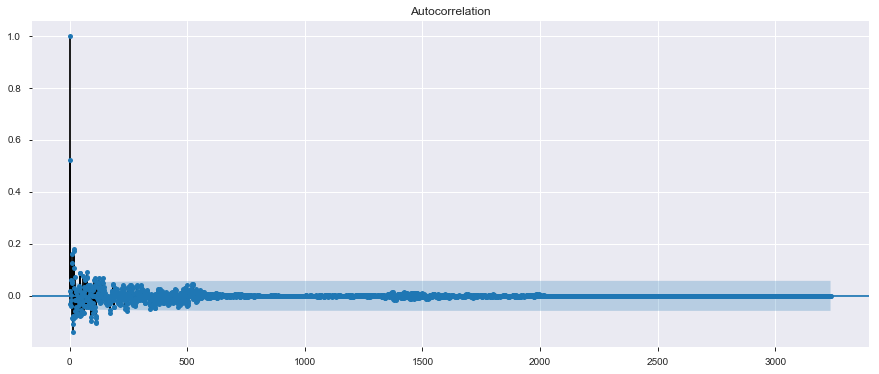

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig_first=plot_acf(y['First Difference'].dropna())


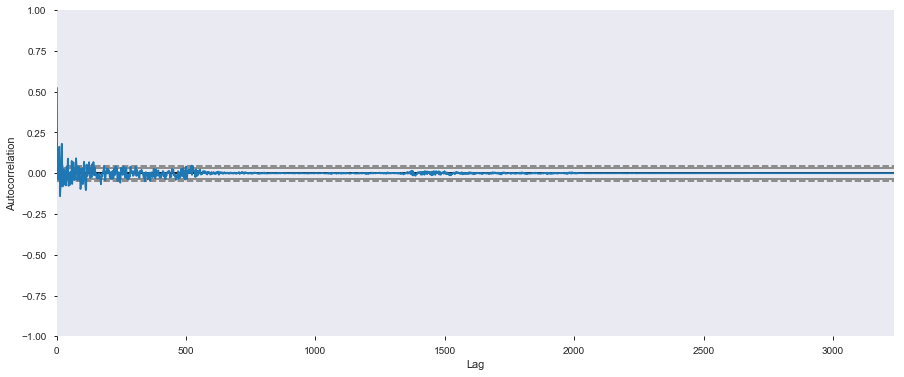

In [30]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y['First Difference'].dropna())
    

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [33]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df1,order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

In [34]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            APrice    No. Observations:                 3255
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -19398.451
Date:                            Sat, 22 Jun 2019   AIC                          38806.902
Time:                                    09:51:38   BIC                          38837.321
Sample:                                07-16-2010   HQIC                         38817.800
                                     - 06-13-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0242      0.005      5.129      0.000       0.015       0.033
ma.L1          0.9999      0.049   

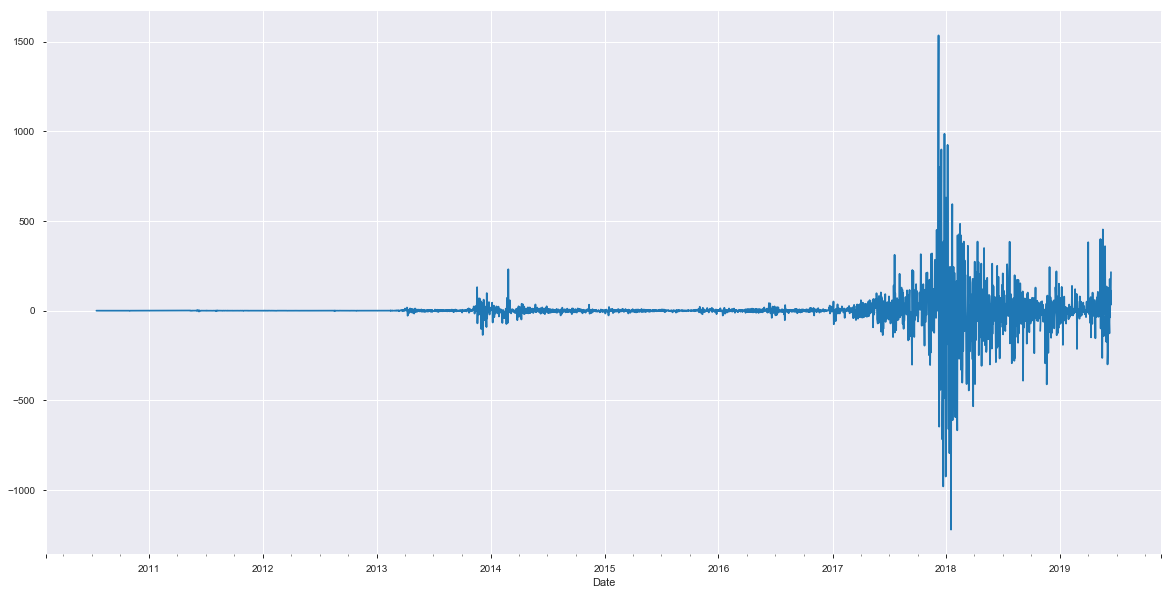

In [35]:
results.resid.plot(figsize=(20,10))

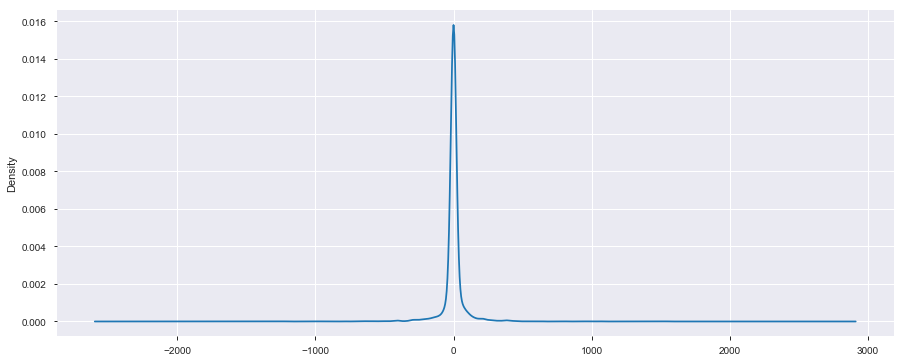

In [36]:
results.resid.plot(kind='kde')

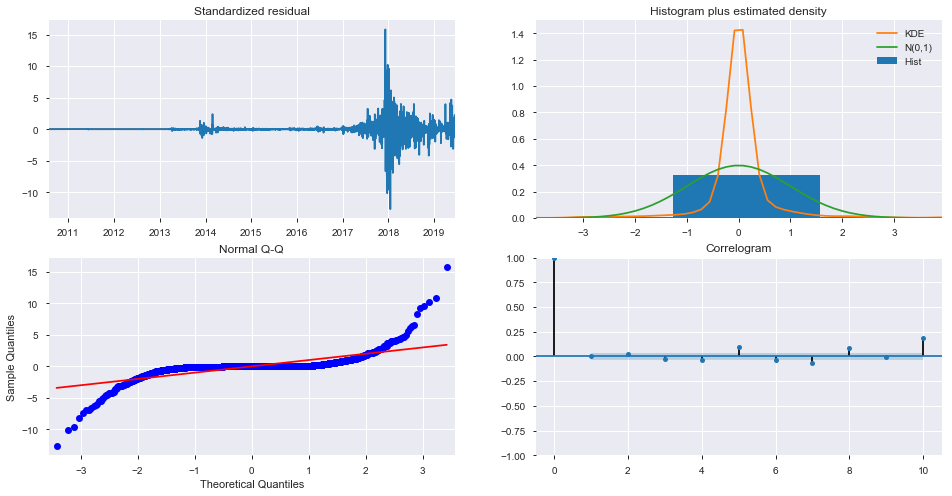

In [37]:


results.plot_diagnostics(figsize=(16, 8))
plt.show()



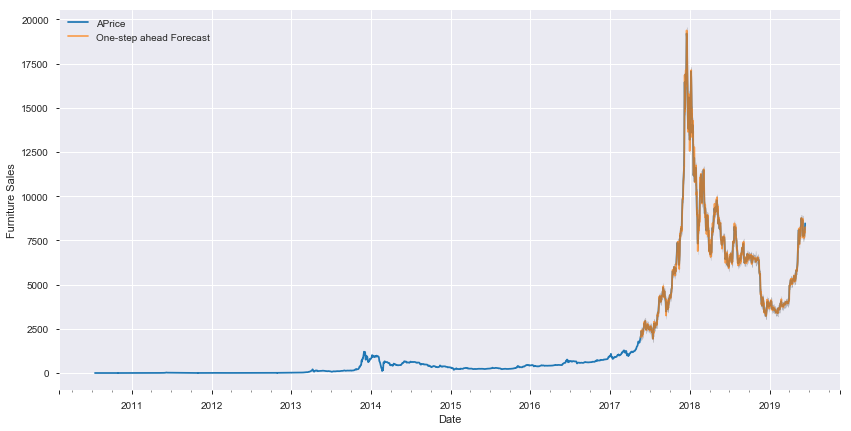

In [38]:
pred = results.get_prediction(start=2500, dynamic=False)
pred_ci = pred.conf_int()

ax = df1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [39]:

y_forecasted = pred.predicted_mean
y_truth = y['APrice ']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))



The Mean Squared Error of our forecasts is 39454.01


In [40]:
from pandas.tseries.offsets import DateOffset

future_dates=[df.index[-1]+DateOffset(days=x) for x in range(1,500)]
future_dates

[Timestamp('2019-06-14 00:00:00'),
 Timestamp('2019-06-15 00:00:00'),
 Timestamp('2019-06-16 00:00:00'),
 Timestamp('2019-06-17 00:00:00'),
 Timestamp('2019-06-18 00:00:00'),
 Timestamp('2019-06-19 00:00:00'),
 Timestamp('2019-06-20 00:00:00'),
 Timestamp('2019-06-21 00:00:00'),
 Timestamp('2019-06-22 00:00:00'),
 Timestamp('2019-06-23 00:00:00'),
 Timestamp('2019-06-24 00:00:00'),
 Timestamp('2019-06-25 00:00:00'),
 Timestamp('2019-06-26 00:00:00'),
 Timestamp('2019-06-27 00:00:00'),
 Timestamp('2019-06-28 00:00:00'),
 Timestamp('2019-06-29 00:00:00'),
 Timestamp('2019-06-30 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-07-02 00:00:00'),
 Timestamp('2019-07-03 00:00:00'),
 Timestamp('2019-07-04 00:00:00'),
 Timestamp('2019-07-05 00:00:00'),
 Timestamp('2019-07-06 00:00:00'),
 Timestamp('2019-07-07 00:00:00'),
 Timestamp('2019-07-08 00:00:00'),
 Timestamp('2019-07-09 00:00:00'),
 Timestamp('2019-07-10 00:00:00'),
 Timestamp('2019-07-11 00:00:00'),
 Timestamp('2019-07-

In [41]:
future_df=pd.DataFrame(index=future_dates,columns=df1.columns)
future_df

,APrice
2019-06-14,NaN
2019-06-15,NaN
2019-06-16,NaN
2019-06-17,NaN
2019-06-18,NaN
2019-06-19,NaN
2019-06-20,NaN
2019-06-21,NaN
2019-06-22,NaN
2019-06-23,NaN


In [42]:
final_df=pd.concat([df1,future_df])
final_df

,APrice
2010-07-16,0.049510
2010-07-17,0.067675
2010-07-18,0.083320
2010-07-19,0.077770
2010-07-20,0.076975
2010-07-21,0.064855
2010-07-22,0.056560
2010-07-23,0.058580
2010-07-24,0.052520
2010-07-25,0.053250


In [43]:
final_df['Forecast']=results.predict(start=3255,end=4210)
final_df

,APrice,Forecast
2010-07-16,0.049510,NaN
2010-07-17,0.067675,NaN
2010-07-18,0.083320,NaN
2010-07-19,0.077770,NaN
2010-07-20,0.076975,NaN
2010-07-21,0.064855,NaN
2010-07-22,0.056560,NaN
2010-07-23,0.058580,NaN
2010-07-24,0.052520,NaN
2010-07-25,0.053250,NaN


In [46]:
final_df.to_excel("bitcoinprice.xlsx")

<IPython.core.display.Javascript object>


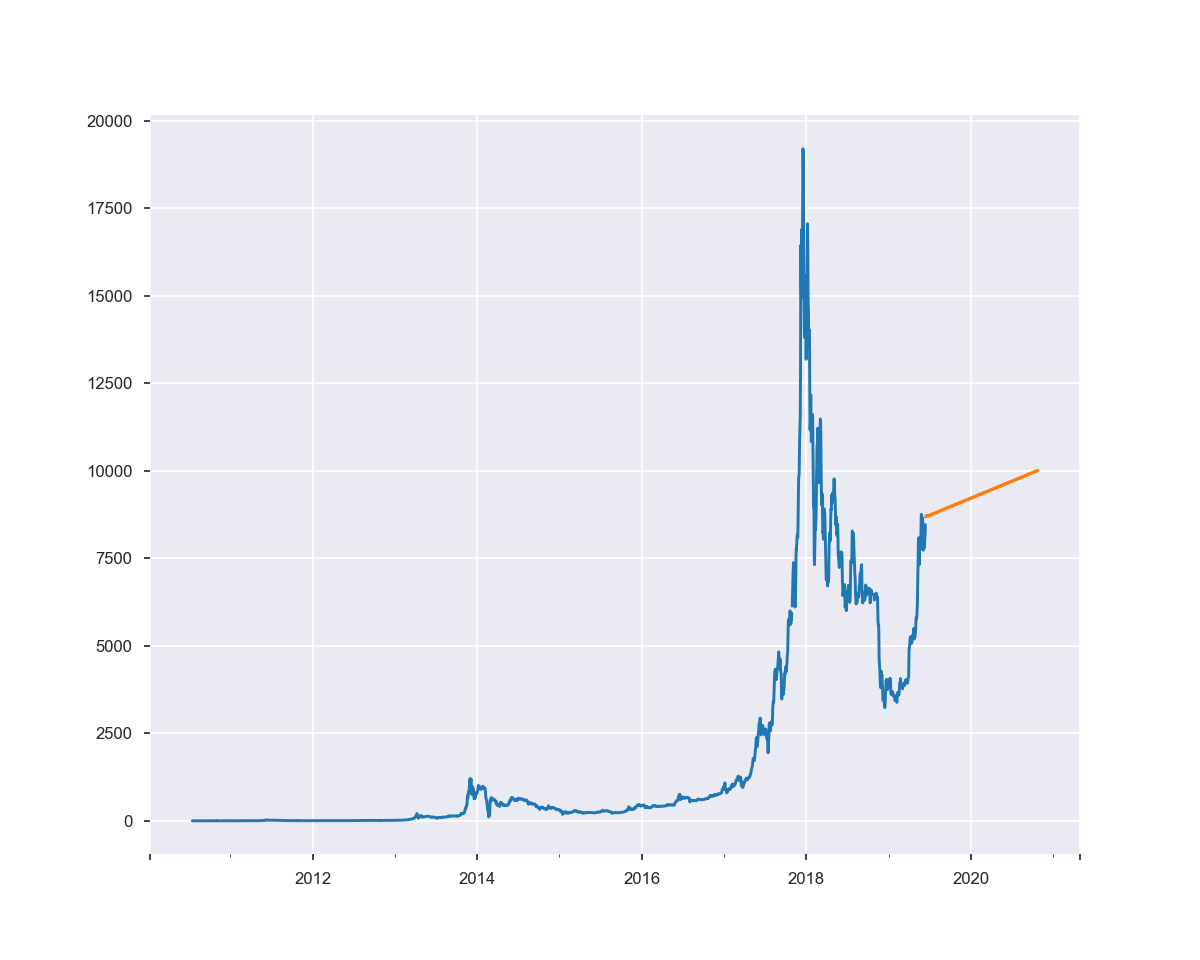

In [52]:
%matplotlib notebook
final_df['APrice '].plot()
final_df['Forecast'].plot(figsize=(10,8))

In [44]:
final_df['APrice '].iplot()
final_df['Forecast'].iplot()